In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.linalg import norm

In [28]:
df = pd.read_csv("/home/ohwada/3d_reconstruction/data/sample_video1/data_3d/3d_position_data.csv")
df.head()

,frame,NOSE_x,NOSE_y,NOSE_z,LEFT_EYE_x,LEFT_EYE_y,LEFT_EYE_z,RIGHT_EYE_x,RIGHT_EYE_y,RIGHT_EYE_z,...,RIGHT_ANKLE_z,TOE_x,TOE_y,TOE_z,HOSEL_x,HOSEL_y,HOSEL_z,GRIP_x,GRIP_y,GRIP_z
0,0,-0.264125,0.291212,1.047597,-0.259694,0.286851,1.049950,-0.269516,0.286664,1.049243,...,1.001056,-0.195946,0.453531,0.895445,-0.200289,0.458541,0.907327,-0.238246,0.387638,1.014841
1,1,-0.265822,0.290657,1.045463,-0.261495,0.286531,1.047868,-0.270537,0.286393,1.047749,...,1.001066,-0.195795,0.453561,0.895421,-0.200260,0.458549,0.907123,-0.238455,0.387565,1.014616
2,2,-0.264044,0.291278,1.046537,-0.259824,0.287095,1.049105,-0.269264,0.286889,1.048260,...,1.000977,-0.195901,0.453613,0.895405,-0.200345,0.458609,0.907224,-0.238711,0.387310,1.014558
3,3,-0.264300,0.291774,1.047883,-0.259915,0.287475,1.050104,-0.269583,0.287248,1.049508,...,1.000860,-0.195705,0.453823,0.895320,-0.200290,0.458706,0.907054,-0.238778,0.387104,1.014645
4,4,-0.265051,0.291917,1.049470,-0.260616,0.287569,1.051138,-0.270085,0.287332,1.051072,...,1.001010,-0.195866,0.453533,0.895317,-0.200450,0.458444,0.907180,-0.238807,0.387209,1.015116


In [29]:
eval_df = pd.DataFrame()

eval_dict = dict(
    UPPER_ARM = ['SHOULDER', 'ELBOW'],
    LOWER_ARM = ['ELBOW', 'WRIST'],
    UPPER_LEG = ['HIP', 'KNEE'],
    LOWER_LEG = ['KNEE', 'ANKLE'],
    UPPER_BODY = ['SHOULDER', 'HIP'],
)
for key, value in eval_dict.items():
    eval_df[f'LEFT_{key}_norm'] = norm(df.filter(like=f'LEFT_{value[0]}').values - df.filter(like=f'LEFT_{value[1]}').values, axis=1)
    eval_df[f'RIGHT_{key}_nrom'] = norm(df.filter(like=f'RIGHT_{value[0]}').values - df.filter(like=f'RIGHT_{value[1]}').values, axis=1)

eval_list = [
    'SHOULDER',
    'HIP',
]
for value in eval_list:
    eval_df[f'{value}_WIDTH_norm'] = norm(df.filter(like=f'LEFT_{value}').values - df.filter(like=f'RIGHT_{value}').values, axis=1)

eval_df.head()

,LEFT_UPPER_ARM_norm,RIGHT_UPPER_ARM_nrom,LEFT_LOWER_ARM_norm,RIGHT_LOWER_ARM_nrom,LEFT_UPPER_LEG_norm,RIGHT_UPPER_LEG_nrom,LEFT_LOWER_LEG_norm,RIGHT_LOWER_LEG_nrom,LEFT_UPPER_BODY_norm,RIGHT_UPPER_BODY_nrom,SHOULDER_WIDTH_norm,HIP_WIDTH_norm
0,0.038170,0.039368,0.037121,0.040014,0.060444,0.056939,0.055970,0.051817,0.061194,0.060520,0.047431,0.037733
1,0.038044,0.039547,0.037591,0.040328,0.059948,0.056707,0.054852,0.051384,0.061930,0.061001,0.047733,0.038265
2,0.038155,0.039934,0.037842,0.040114,0.059932,0.056821,0.055302,0.051399,0.062128,0.061206,0.047686,0.038058
3,0.037986,0.039863,0.037836,0.040046,0.059880,0.057098,0.055345,0.051712,0.061669,0.060869,0.047428,0.037859
4,0.037460,0.040148,0.037570,0.039792,0.059710,0.056982,0.055509,0.051728,0.061887,0.061063,0.047177,0.037809


In [30]:
eval_df = eval_df*6

In [31]:
take_back = 190
down_swing = 320
follow_thourgh = 360
finish = 430

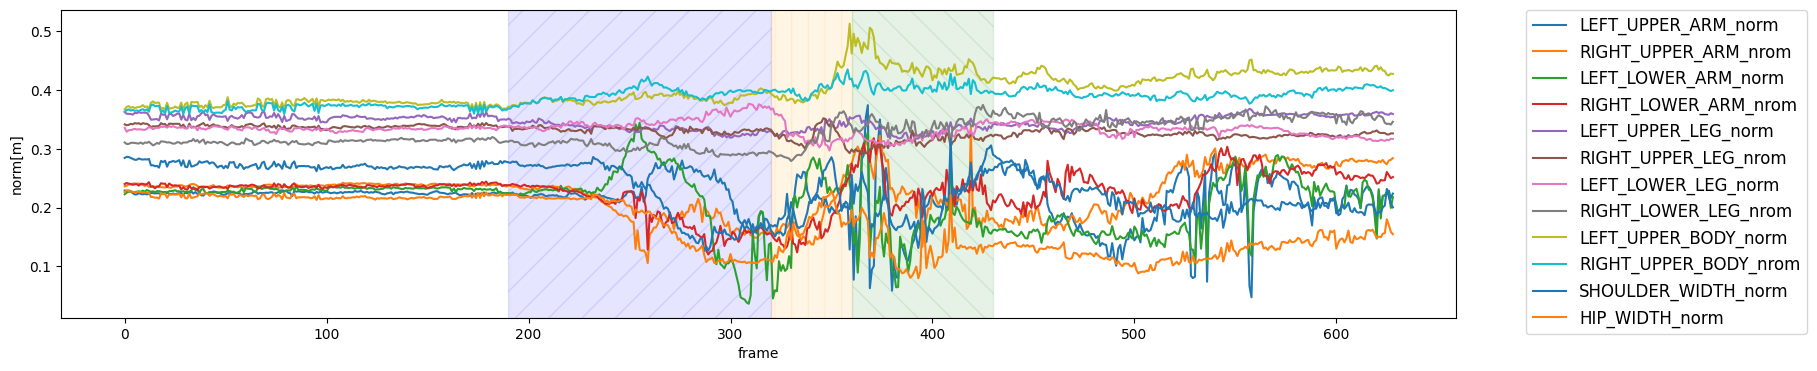

In [38]:
fig, ax = plt.subplots(figsize=(18, 4))
for column_name in eval_df.columns:
    ax = plt.plot(eval_df.index, eval_df[column_name].values, label=column_name)
plt.axvspan(take_back, down_swing, color='blue', alpha=0.1, hatch='/') # take back
plt.axvspan(down_swing, follow_thourgh, color='orange', alpha=0.1, hatch='|') # down swing
plt.axvspan(follow_thourgh, finish, color='green', alpha=0.1, hatch='\\') # follow through
plt.xlabel('frame')
plt.ylabel('norm[m]')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
plt.show()

In [33]:
eval_df.iloc[:take_back].describe()

,LEFT_UPPER_ARM_norm,RIGHT_UPPER_ARM_nrom,LEFT_LOWER_ARM_norm,RIGHT_LOWER_ARM_nrom,LEFT_UPPER_LEG_norm,RIGHT_UPPER_LEG_nrom,LEFT_LOWER_LEG_norm,RIGHT_LOWER_LEG_nrom,LEFT_UPPER_BODY_norm,RIGHT_UPPER_BODY_nrom,SHOULDER_WIDTH_norm,HIP_WIDTH_norm
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,0.224864,0.237828,0.230382,0.237087,0.354255,0.338697,0.334147,0.312548,0.376830,0.370195,0.271961,0.219002
std,0.001895,0.002170,0.003148,0.002714,0.004166,0.002661,0.002779,0.003033,0.005253,0.005023,0.005163,0.003574
min,0.219508,0.232685,0.222727,0.228889,0.345000,0.331870,0.325319,0.305942,0.364731,0.359369,0.261909,0.213074
25%,0.223620,0.235848,0.227602,0.235252,0.351481,0.336946,0.332496,0.310276,0.372637,0.365603,0.268073,0.216117
50%,0.224912,0.238001,0.231077,0.236986,0.354032,0.338428,0.334371,0.312662,0.378235,0.371857,0.270500,0.217992
75%,0.226101,0.239495,0.233027,0.239031,0.356502,0.340576,0.336027,0.315019,0.380377,0.373923,0.275620,0.221633
max,0.229386,0.242168,0.236611,0.244356,0.363800,0.344112,0.340429,0.320125,0.387952,0.381557,0.286396,0.229592


In [34]:
eval_df.iloc[take_back:finish].describe()

,LEFT_UPPER_ARM_norm,RIGHT_UPPER_ARM_nrom,LEFT_LOWER_ARM_norm,RIGHT_LOWER_ARM_nrom,LEFT_UPPER_LEG_norm,RIGHT_UPPER_LEG_nrom,LEFT_LOWER_LEG_norm,RIGHT_LOWER_LEG_nrom,LEFT_UPPER_BODY_norm,RIGHT_UPPER_BODY_nrom,SHOULDER_WIDTH_norm,HIP_WIDTH_norm
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,0.216200,0.202575,0.201217,0.202803,0.334267,0.324421,0.336780,0.315584,0.404894,0.398292,0.214546,0.162086
std,0.047054,0.041584,0.068523,0.042470,0.008732,0.012652,0.018224,0.022001,0.030686,0.012154,0.048345,0.044305
min,0.058574,0.105427,0.036266,0.120067,0.313329,0.292119,0.297273,0.279295,0.371572,0.368617,0.125418,0.079543
25%,0.197236,0.172136,0.157614,0.165388,0.328373,0.314648,0.321390,0.297709,0.382453,0.390483,0.167358,0.120111
50%,0.219348,0.200638,0.222548,0.209867,0.334264,0.327978,0.337598,0.309662,0.391212,0.398244,0.216535,0.164344
75%,0.243326,0.231249,0.239580,0.231100,0.340022,0.333838,0.347774,0.332815,0.428547,0.404765,0.267007,0.212105
max,0.374407,0.338861,0.344512,0.318174,0.356536,0.352130,0.376648,0.374908,0.513106,0.435195,0.317527,0.228353


In [35]:
left_columns = eval_df.filter(like='LEFT').columns
right_columns = eval_df.filter(like='RIGHT').columns
eval_df[left_columns].describe()

,LEFT_UPPER_ARM_norm,LEFT_LOWER_ARM_norm,LEFT_UPPER_LEG_norm,LEFT_LOWER_LEG_norm,LEFT_UPPER_BODY_norm
count,629.000000,629.000000,629.000000,629.000000,629.000000
mean,0.216466,0.207581,0.345280,0.334630,0.402505
std,0.040939,0.052115,0.011853,0.012810,0.027478
min,0.047225,0.036266,0.313329,0.297273,0.364731
25%,0.205259,0.166492,0.336257,0.328776,0.379393
50%,0.223698,0.227017,0.347522,0.334774,0.391815
75%,0.228558,0.233445,0.355038,0.340150,0.427674
max,0.374407,0.344512,0.368197,0.376648,0.513106


In [36]:
eval_df[right_columns].describe()

,RIGHT_UPPER_ARM_nrom,RIGHT_LOWER_ARM_nrom,RIGHT_UPPER_LEG_nrom,RIGHT_LOWER_LEG_nrom,RIGHT_UPPER_BODY_nrom
count,629.000000,629.000000,629.000000,629.000000,629.000000
mean,0.224580,0.225294,0.329064,0.325995,0.388608
std,0.040004,0.035542,0.010527,0.022593,0.015136
min,0.105427,0.120067,0.292119,0.279295,0.359369
25%,0.192657,0.208736,0.323126,0.309572,0.374276
50%,0.235355,0.235181,0.331486,0.315996,0.390496
75%,0.240594,0.240791,0.337298,0.346997,0.399608
max,0.338861,0.318174,0.352130,0.374908,0.435195


In [44]:
for l_col, r_col in zip(left_columns, right_columns):
    print(f'{l_col} - {r_col}')
    print("mean")
    print((eval_df.iloc[take_back:finish][l_col] - eval_df.iloc[take_back:finish][r_col]).mean())
    print("max")
    print((eval_df.iloc[take_back:finish][l_col] - eval_df.iloc[take_back:finish][r_col]).max())
    print("min")
    print((eval_df.iloc[take_back:finish][l_col] - eval_df.iloc[take_back:finish][r_col]).min())
    print()

LEFT_UPPER_ARM_norm - RIGHT_UPPER_ARM_nrom
mean
0.013624924912804419
max
0.1432602290662372
min
-0.21798447022743453

LEFT_LOWER_ARM_norm - RIGHT_LOWER_ARM_nrom
mean
-0.001586039364126742
max
0.16916927618308392
min
-0.1798616248722476

LEFT_UPPER_LEG_norm - RIGHT_UPPER_LEG_nrom
mean
0.009845699662345032
max
0.06120436942204144
min
-0.032567931574513154

LEFT_LOWER_LEG_norm - RIGHT_LOWER_LEG_nrom
mean
0.021195397737132155
max
0.08457670190744204
min
-0.05336520816424256

LEFT_UPPER_BODY_norm - RIGHT_UPPER_BODY_nrom
mean
0.006602258546582194
max
0.10492601230718784
min
-0.034564744319657004

